In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 4] # sets the size of figures in this notebook

data = pd.read_csv("ExtractedTweets.csv")

In [2]:
#democrats tweets
wordlist = " ".join(data[data.Party=="Democrat"].Tweet.values).split()
cleanedwords = [word for word in wordlist if not word.startswith("http")]
cleanedwords = [word for word in cleanedwords if word!="RT"]
cleanedwords = [word for word in cleanedwords if word!="&amp;"]
demtweets = " ".join(cleanedwords).lower()

In [3]:
#republicans tweets
wordlist = " ".join(data[data.Party=="Republican"].Tweet.values).split()
cleanedwords = [word for word in wordlist if not word.startswith("http")]
cleanedwords = [word for word in cleanedwords if word!="RT"]
cleanedwords = [word for word in cleanedwords if word!="&amp;"]
reptweets = " ".join(cleanedwords).lower()

In [4]:
#masks
demmask = np.array(Image.open("dem.jpg"))
demmask
repmask = np.array(Image.open("rep.png"))
repmask = np.array([[255 if val==2 else val for val in arr] for arr in repmask])

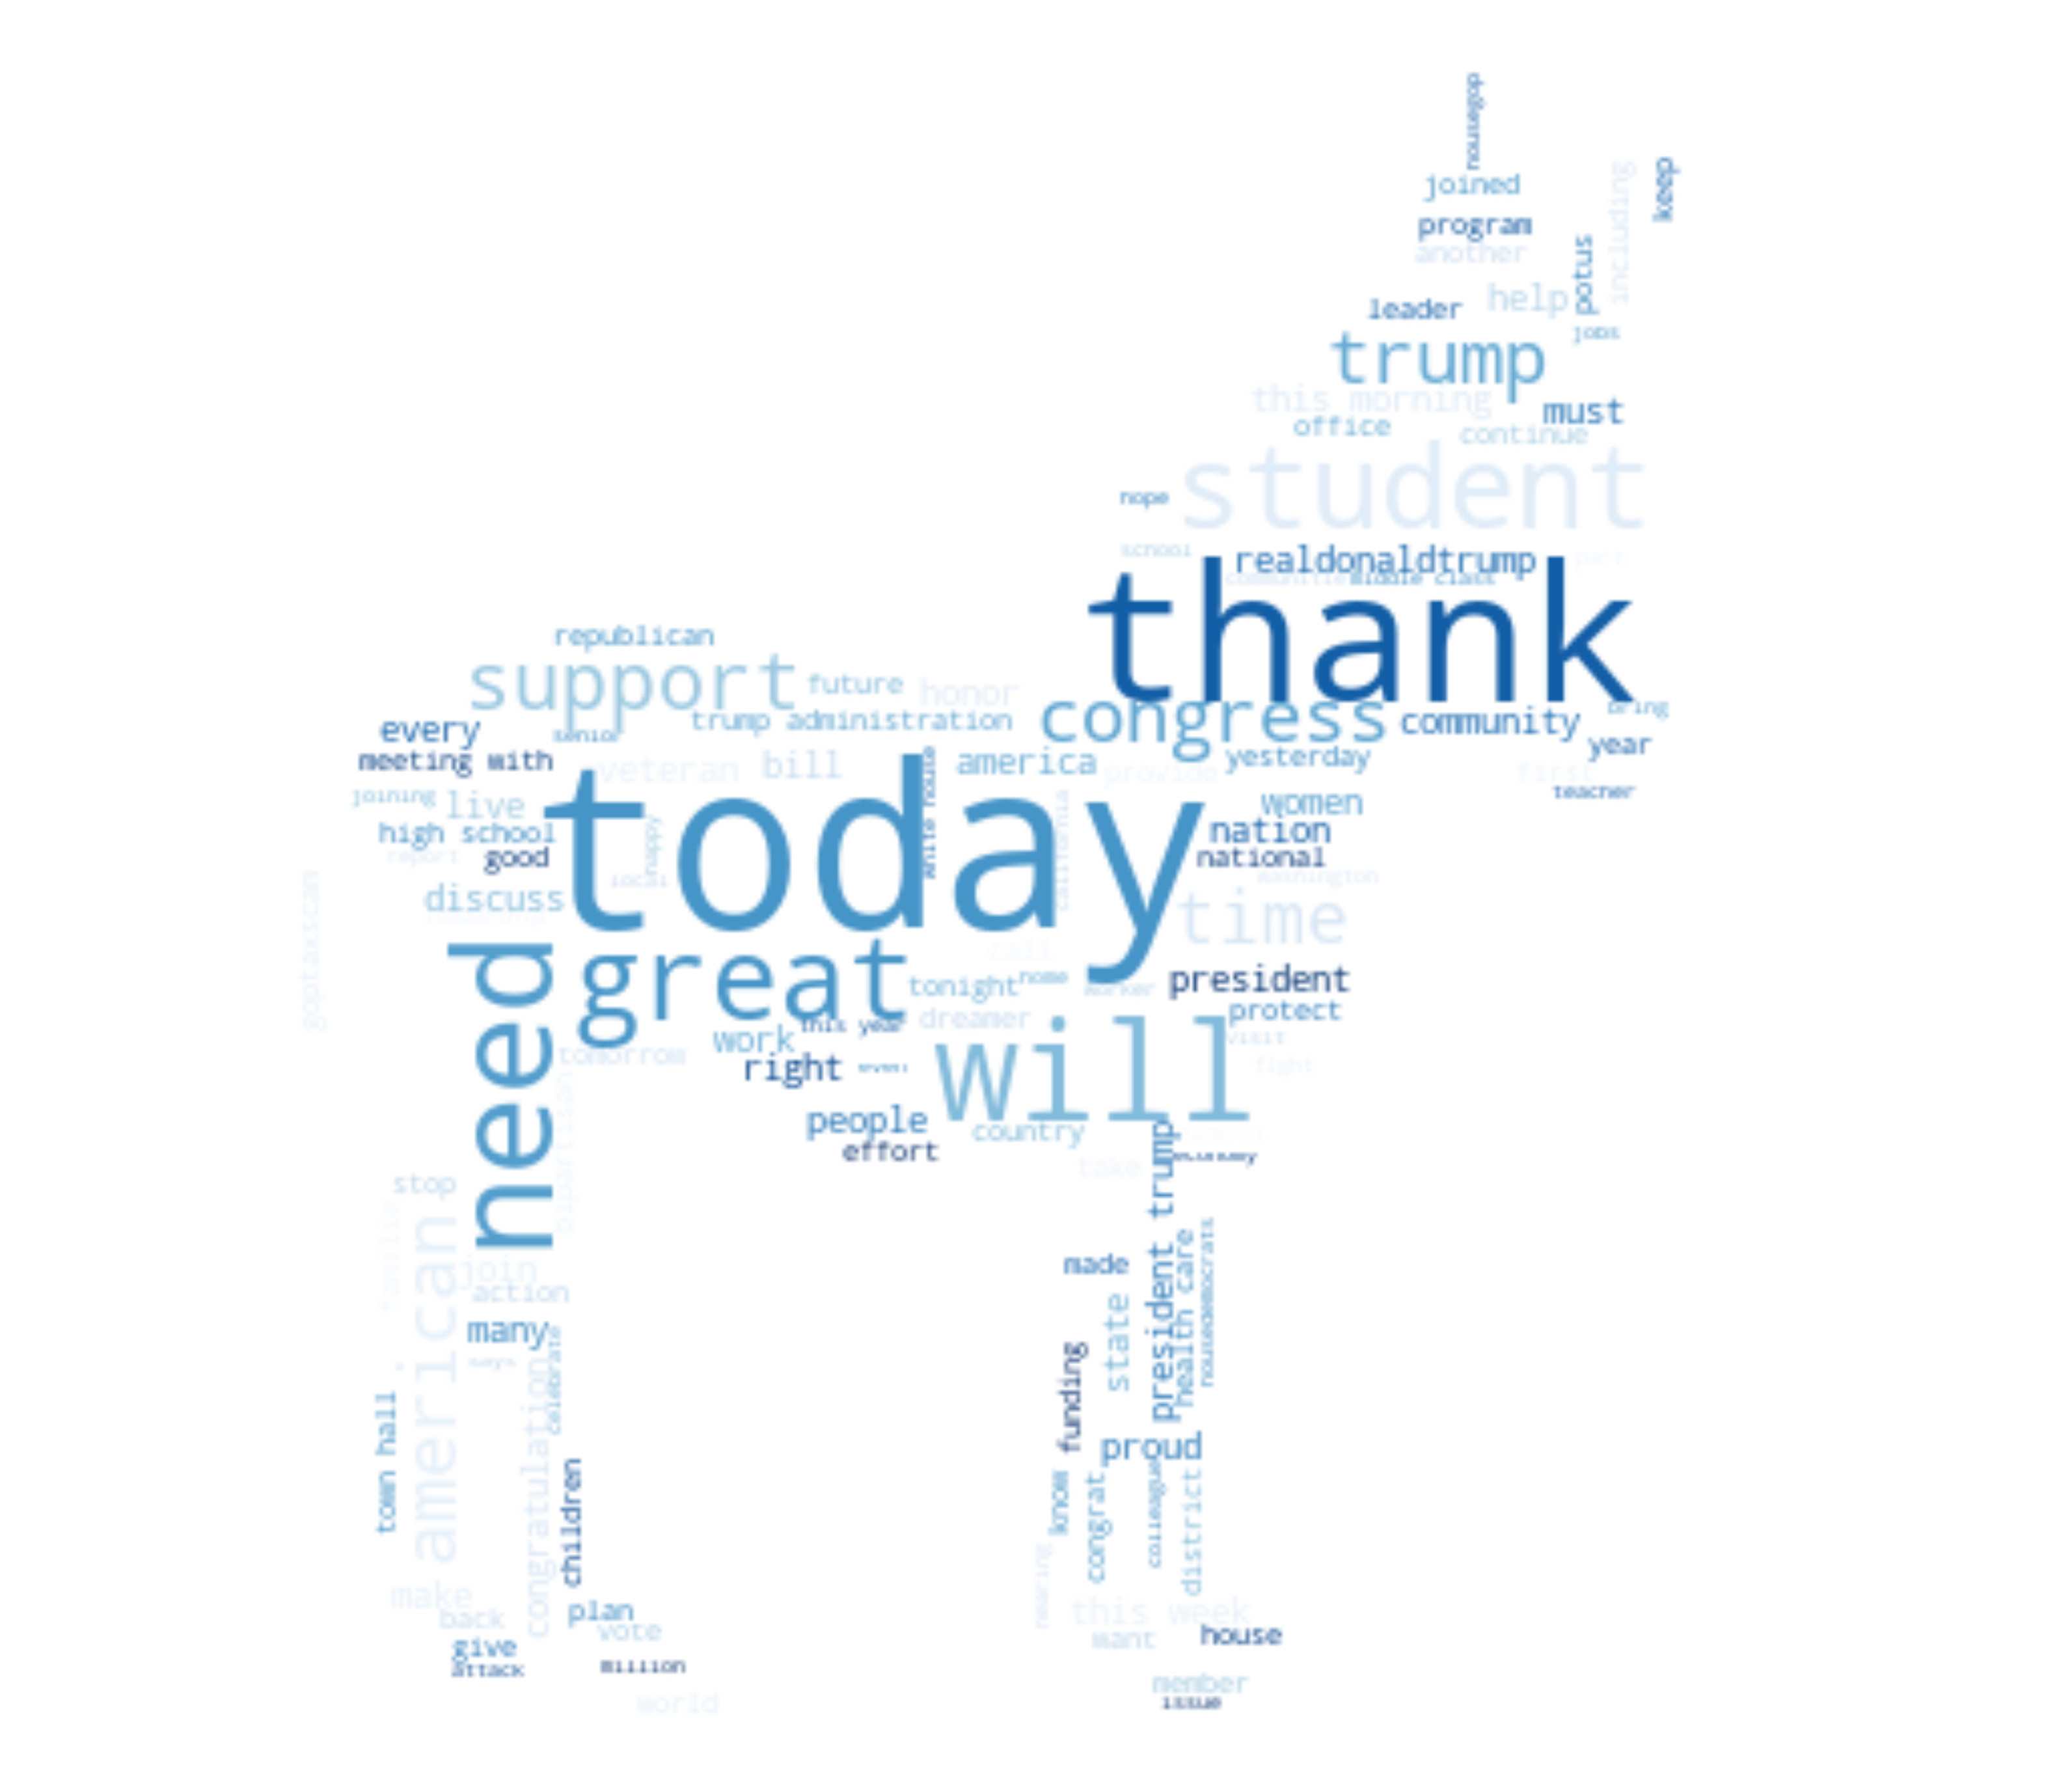

In [5]:
# democrat wordcloud
wc = WordCloud(background_color="white", max_words=200, mask=demmask,
              colormap="Blues", min_word_length=4)

# Generate a wordcloud
wc.generate(demtweets)

# show
plt.figure(figsize=[100,50])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

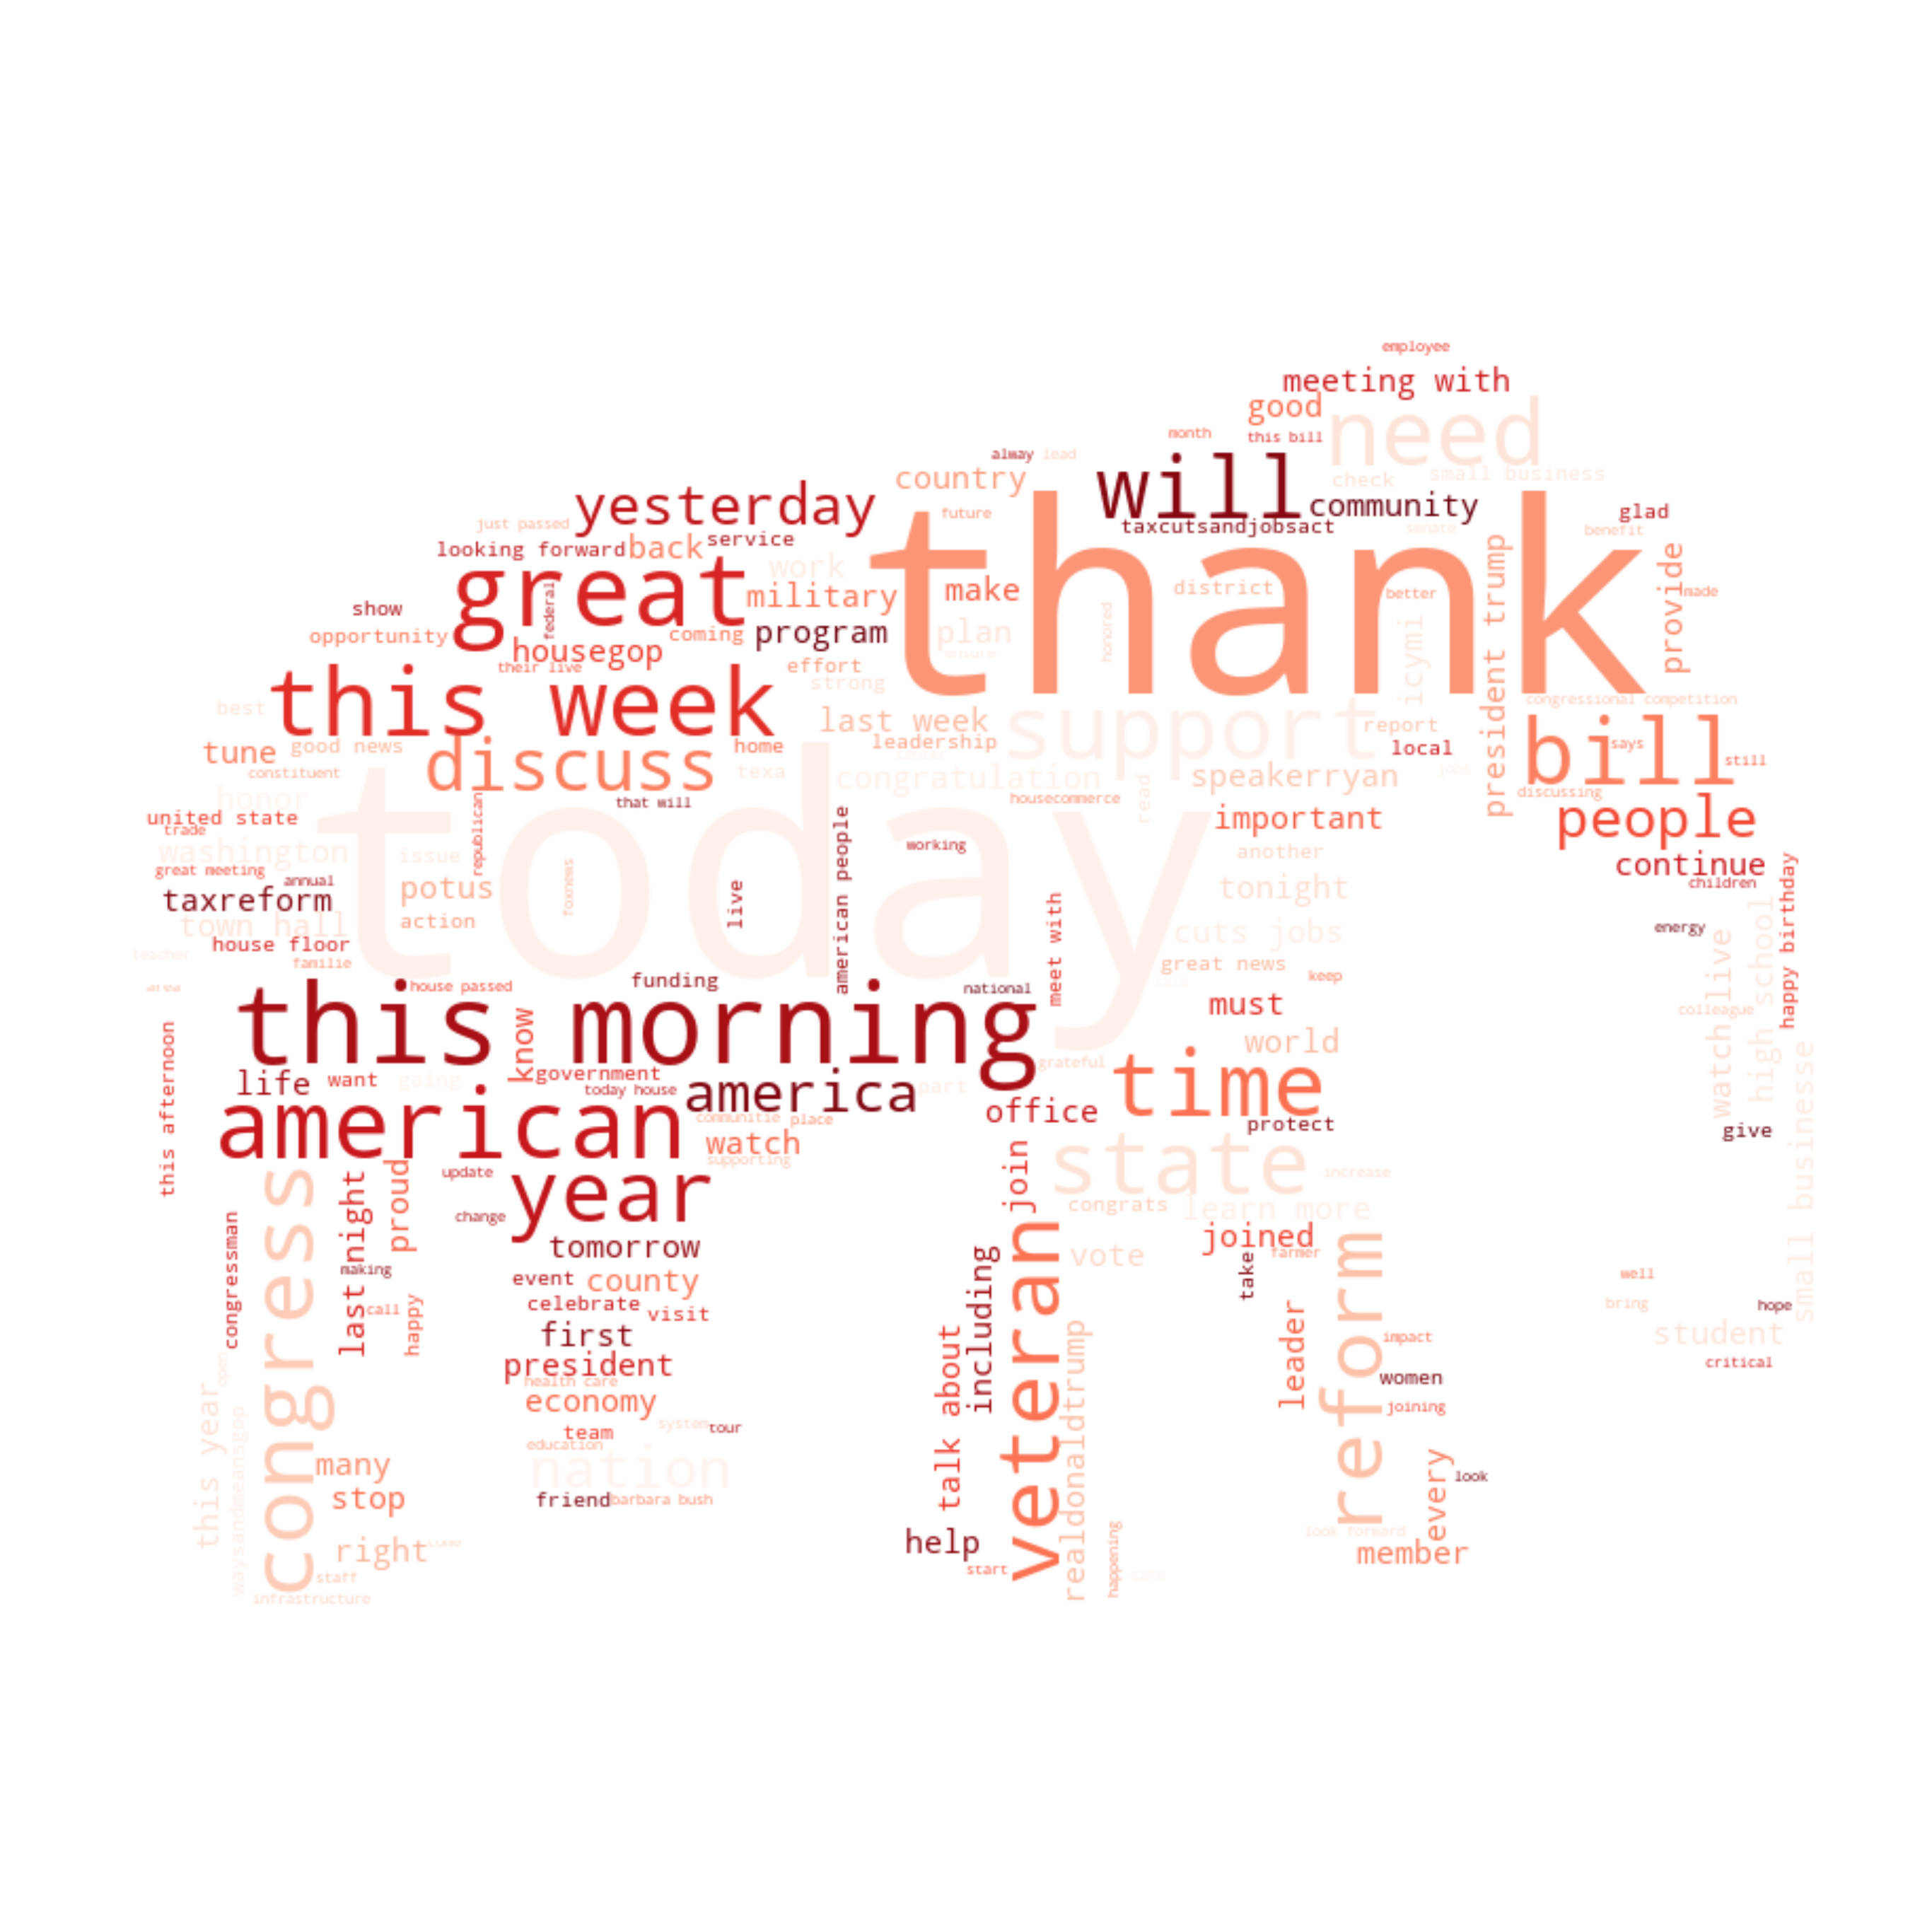

In [6]:
# republican wordcloud
wc = WordCloud(background_color="white", max_words=200, mask=repmask,
              colormap="Reds", min_word_length=4)

# Generate a wordcloud
wc.generate(reptweets)

# show
plt.figure(figsize=[100,50])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()